(From a private repository.)

In [1]:
#Import Libraries
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
plt.style.use('../mplstyles/stylelib/standard.mplstyle')
from matplotlib.lines import Line2D
from tabulate import tabulate
import sys
sys.path.append('./python')
import nc_kinematics as nck
import lindhard as lin
import R68_yield as R68y
from hist import histogramable as h

#Select a file.
file = 'data/longsim.root'

dict_keys(['xx', 'yy', 'ex', 'ey'])


In [2]:
#It's running, there's just a lot of data. Please be patient!

real_Lind = np.ndarray.flatten(np.asarray(h(file)[0]))
real_Sor = np.ndarray.flatten(np.asarray(h(file,model='Sorenson')[0]))
small_Lind = np.ndarray.flatten(np.asarray(h(file,scalefactor=0.2)[0]))
small_Sor = np.ndarray.flatten(np.asarray(h(file,model='Sorenson',scalefactor=0.2)[0]))

real_Lind = real_Lind[real_Lind >= 0]
real_Sor = real_Sor[real_Sor >= 0]
small_Lind = small_Lind[small_Lind >= 0]
small_Sor = small_Sor[small_Sor >= 0]

In [3]:
def format_exponent(ax, axis='y'):

    # Change the ticklabel format to scientific format
    ax.ticklabel_format(axis=axis, style='sci', scilimits=(-2, 2))

    # Get the appropriate axis
    if axis == 'y':
        ax_axis = ax.yaxis
        x_pos = 0.0
        y_pos = 1.0
        horizontalalignment='left'
        verticalalignment='bottom'
    else:
        ax_axis = ax.xaxis
        x_pos = 1.0
        y_pos = -0.05
        horizontalalignment='right'
        verticalalignment='top'

    # Run plt.tight_layout() because otherwise the offset text doesn't update
    plt.tight_layout()

    # Get the offset value
    offset = ax_axis.get_offset_text().get_text()

    if len(offset) > 0:
        # Get that exponent value and change it into latex format
        minus_sign = u'\u2212'
        expo = np.float(offset.replace(minus_sign, '-').split('e')[-1])
        offset_text = r'x$\mathregular{10^{%d}}$' %expo

        # Turn off the offset text that's calculated automatically
        ax_axis.offsetText.set_visible(False)

        # Add in a text box at the top of the y axis
        ax.text(x_pos, y_pos, offset_text, transform=ax.transAxes,
               horizontalalignment=horizontalalignment,
               verticalalignment=verticalalignment,fontsize=30)
    return ax

/home/gerudo7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


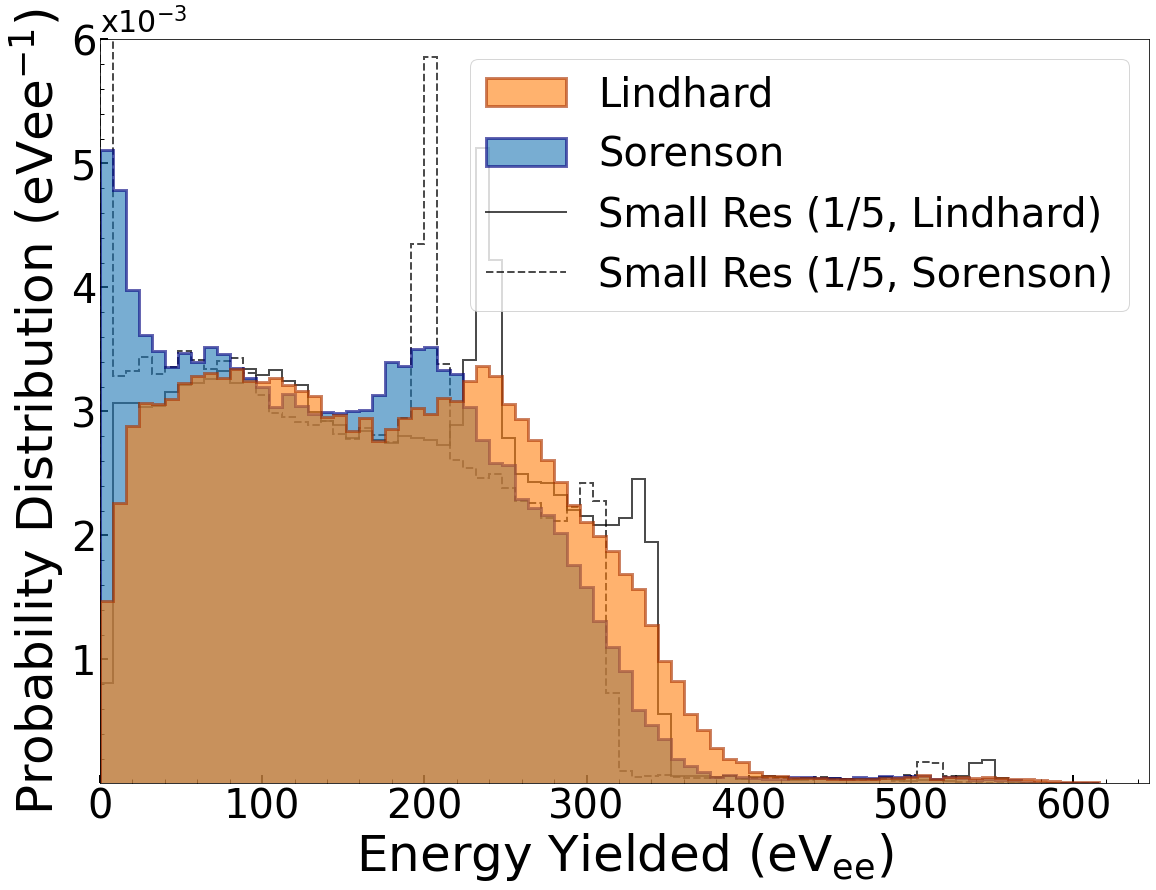

In [4]:
fig, ax = plt.subplots(figsize=(16,12))

binsize = 8 #bin width in eVee
bins = np.arange(0,620,binsize)

plt.hist(small_Lind,alpha=0.7,label='Small Res (1/5, Lindhard)',histtype='step',edgecolor='black',density='True',linewidth=2,bins=bins)
plt.hist(small_Sor,alpha=0.7,label='Small Res (1/5, Sorenson)',histtype='step',edgecolor='black',linestyle='--',density='True',linewidth=2,bins=bins)
plt.hist(real_Sor,alpha=0.6,label='Sorenson',histtype='step',fill=True,density='True',bins=bins,linewidth=3,edgecolor='navy',color='C0')
plt.hist(real_Lind,alpha=0.6,label='Lindhard',histtype='step',fill=True,density='True',bins=bins,linewidth=3,edgecolor='#a30',color='C1')

plt.xlabel(r"Energy Yielded ($\mathrm{eV}_{\mathrm{ee}}$)",fontsize=50)
plt.ylabel("Probability Distribution (eVee$^{-1}$)",fontsize=50)#Counts/(total counts * bin width)")

ax = format_exponent(ax, axis='y')
ax.tick_params(axis='both',which='major',labelsize=40)

plt.xlim([0,None])
plt.ylim([6e-13,6e-3]) #Make corner less awkward. Smallest starting value that will make the extra 0 go away

#Legend
LindPatch = mpatch.Patch(facecolor='C1',edgecolor='#a30',linewidth=3,label='Lindhard',alpha=0.6)
SorPatch = mpatch.Patch(facecolor='C0',edgecolor='navy',linewidth=3,label='Sorenson',alpha=0.6)
LindLine = Line2D([0],[0],alpha=0.7,color='black',label='Small Res (1/5, Lindhard)')
SorLine = Line2D([0],[0],linestyle='--',alpha=0.7,color='black',label='Small Res (1/5, Sorenson)')

plt.legend(handles=[LindPatch,SorPatch,LindLine,SorLine],fontsize=40)
plt.show()